In [ ]:
pip install pandas networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [5]:
#load the csv files
superhero_csv = pd.read_csv('superheroes.csv')
print("SuperHeros List :")
print(superhero_csv.head(5).to_string(index=False))

links_csv = pd.read_csv('links.csv')
print("Links File :")
print(links_csv.head(5).to_string(index=False))

SuperHeros List :
 id            name created_at
  1      Spider-Man 2025-05-20
  2        Iron Man 2025-05-20
  3            Thor 2025-05-21
  4            Hulk 2025-05-21
  5 Captain America 2025-05-22
Links File :
 source  target
      1       2
      1       3
      1       4
      1       5
      1       6


In [7]:
# create node and connections
# create empty graph called as grp
grp = nx.Graph()

#add the node
for _, row in superhero_csv.iterrows():
    grp.add_node(
    row['id'],
    name = row['name'],
    created_at=datetime.strptime(row['created_at'], '%Y-%m-%d')
)

for _, row in links_csv.iterrows():
    grp.add_edge(row['source'], row['target'])

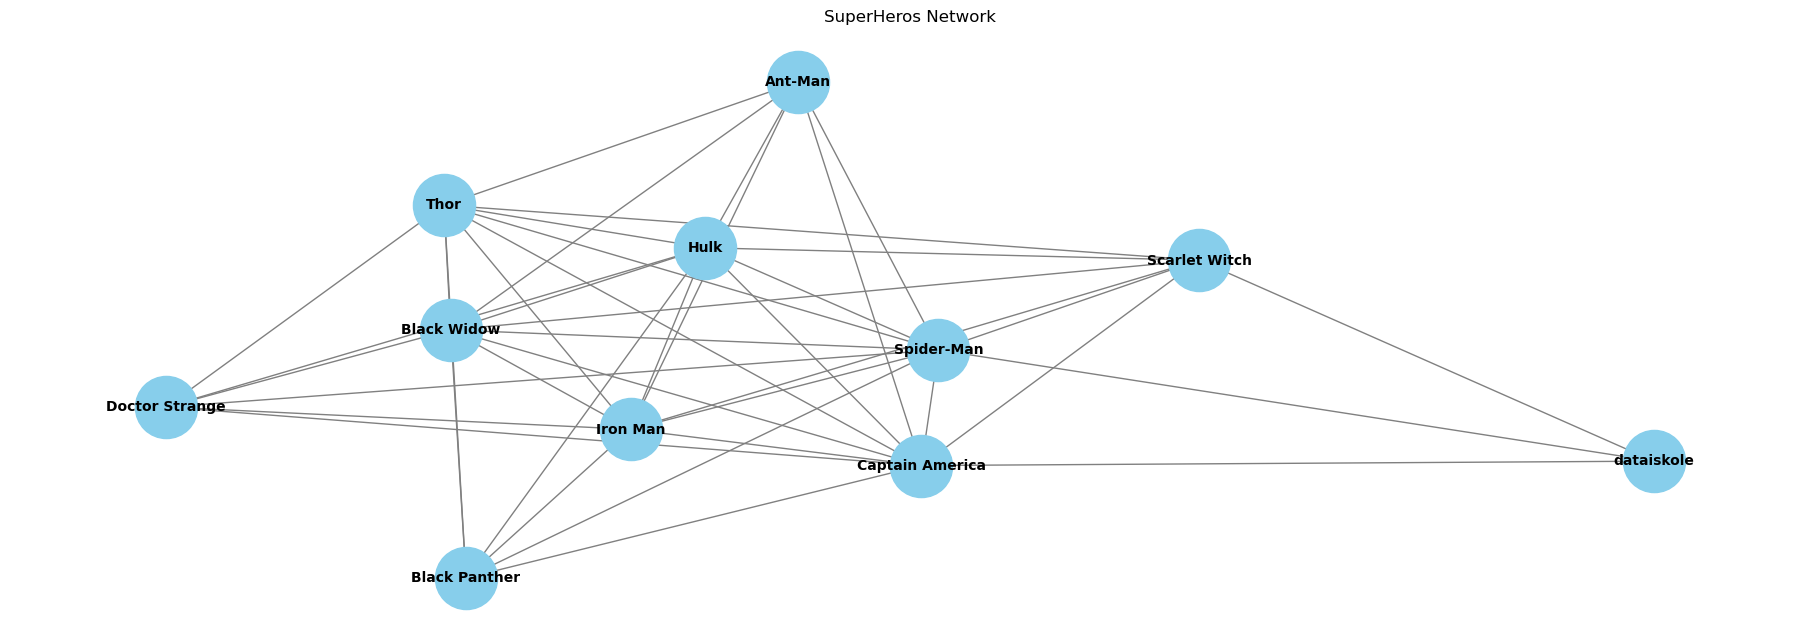

In [19]:
# Visualize the Grpah
plt.figure(figsize=(18,6))

labels = {node: grp.nodes[node]['name'] for node in grp.nodes}

nx.draw(
    grp,
    labels=labels,            
    with_labels=True,         
    node_color='skyblue',     
    node_size=2000,           
    font_size=10,             
    font_weight='bold',       
    edge_color='gray'         
)

plt.title("SuperHeros Network")
plt.show()

In [21]:
print("Total number of Superheros:", grp.number_of_nodes())
print("Total number of Connections:", grp.number_of_edges())

Total number of Superheros: 11
Total number of Connections: 42


In [22]:
#uperheroes added in the last 3 days
last_three_days= datetime.now()-timedelta(days=3)
recent_heros=[
    grp.nodes[n]['name']
    for n in grp.nodes
    if grp.nodes[n]['created_at']>= last_three_days
]

print("Superheros added in last 3 days:",recent_heros)

Superheros added in last 3 days: ['dataiskole']


In [23]:
# The top 3 most connected superheroes
connetions_degree=[(n,d) for n,d in grp.degree()]
connetions_degree.sort(key=lambda x:x[1], reverse=True)
top_3= [(grp.nodes[n]['name'], d) for n,d in connetions_degree[:3]]

for name, degree in top_3:
    print(f"{name}: {degree} connections")

Spider-Man: 10 connections
Captain America: 10 connections
Iron Man: 9 connections


In [26]:
# Dataiskole superhero info
dataiskole_id = superhero_csv[superhero_csv['name']=='dataiskole']['id'].values[0]
created_date = grp.nodes[dataiskole_id]['created_at'].strftime('%y-%m-%d')
friends = [grp.nodes[friend]['name'] for friend in grp.neighbors(dataiskole_id)]

print(f"dataiskole was created on : {created_date}")
print(f"dataiskole's friends: {friends}")

dataiskole was created on : 25-05-26
dataiskole's friends: ['Spider-Man', 'Captain America', 'Scarlet Witch']


In [28]:
# create new super hero
def add_superhero():
    global superhero_csv
    name= input("Enter the superhero's name: ").strip()
    created_at= datetime.today()

    new_id = superhero_csv['id'].max()+1

    new_row = pd.DataFrame([{
        'id': new_id,
        'name': name,
        'created_at': created_at.strftime('%y-%m-%d')
    }])
  
    superhero_csv = pd.concat([superhero_csv, new_row], ignore_index=True)

    grp.add_node(new_id, name=name, created_at=created_at)
    print(f"SuperHero '{name} added with ID {new_id} on {created_at.strftime('%y-%m-%d')}.")

In [29]:
add_superhero()

SuperHero 'Minnal Murali added with ID 12 on 25-05-28.


In [36]:
def add_connections():
    print("\nNow, let's add friends (connections).")
    print("Available superheroes:")
    for _, row in superhero_csv.iterrows():
        print(f"{row['id']}: {row['name']}")

    try:
        selected_id = int(input("\nEnter the ID of the superhero you want to add friends to: ").strip())
    except ValueError:
        print("Invalid input. Please enter a numeric ID.")
        return
    if selected_id not in grp.nodes:
        print("Superhero ID not found.")
        return

    print(f"\nYou selected: {grp.nodes[selected_id]['name']}")
    friend_ids = input("\nEnter friend IDs to connect with (comma-separated): ").split(',')

    for friend_id in friend_ids:
        try:
            fid = int(friend_id.strip()) 
            if fid in grp.nodes and fid != selected_id:
                grp.add_edge(selected_id, fid)
                print(f"Connected {grp.nodes[selected_id]['name']} with {grp.nodes[fid]['name']}")
            else:
                print(f"ID {fid} is invalid or cannot connect to self.")
        except ValueError:
            print(f"'{friend_id}' is not a valid ID.")


In [37]:
add_connections()


Now, let's add friends (connections).
Available superheroes:
1: Spider-Man
2: Iron Man
3: Thor
4: Hulk
5: Captain America
6: Black Widow
7: Doctor Strange
8: Black Panther
9: Scarlet Witch
10: Ant-Man
11: dataiskole
12: Minnal Murali

You selected: Minnal Murali
Connected Minnal Murali with Captain America
